In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
def axis_label(ax, label, pos, fontsize=12):
    limits = ax.get_xlim()[1]*pos[0], ax.get_ylim()[1]*pos[1]
    ax.annotate(label, xy=limits, fontsize=fontsize, fontweight='bold')

Text(0.5, 1.0, '$\\sigma_{xy} = 0.8$')

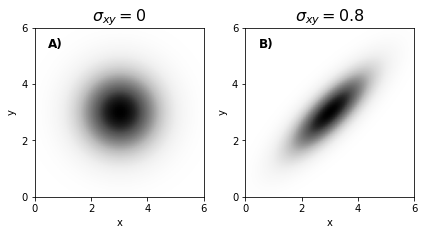

In [3]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv1 = multivariate_normal([3, 3], [[1, 0],[0, 1]])
rv2 = multivariate_normal([3, 3], [[1, -0.8],[-0.8, 1]])
Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,3.5))
ax1.imshow(Z1, extent=[0,6,0,6], cmap=plt.get_cmap("Greys"))
ax2.imshow(Z2, extent=[0,6,0,6], cmap=plt.get_cmap("Greys"))
axis_label(ax1, "A)", (0.08,0.88))
axis_label(ax2, "B)", (0.08,0.88))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_yticks([0,2,4,6])
ax1.set_yticks([0,2,4,6])
plt.tight_layout()
ax1.set_title(r"$\sigma_{xy} = 0$", fontsize=16)
ax2.set_title(r"$\sigma_{xy} = 0.8$", fontsize=16)
#plt.savefig("Kap2-GPintroduction/img/mvn_dist_example.png", bbox_inches='tight', dpi=300, transparent=True)

0.24194650203601747


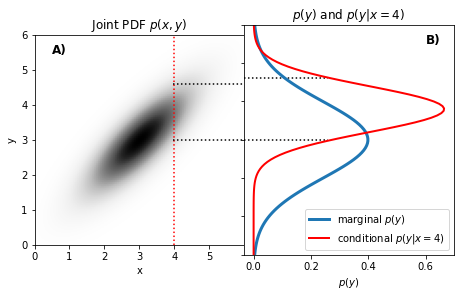

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex="col", sharey="row", gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(6.5,4.23))
ax1.set_yticks([0,1,2,3,4,5,6])
ax1.set_xticks([0,1,2,3,4,5])

ax1.set_title(r"Joint PDF $p(x,y)$", fontsize=12)
ax2.set_title(r"$p(y)$ and $p(y|x=4)$", fontsize=12)
axis_label(ax1, "A)", (0.1,0.91))
axis_label(ax2, "B)", (0.6,5.5))

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.imshow(Z2, extent=[0,6,0,6], cmap=plt.get_cmap("Greys"))
ax1.axvline(x=4, color="r", ls=":")
ax1.axhline(y=4.6, color="black", ls=":", xmin=0.66)
ax1.axhline(y=3, color="black", ls=":", xmin=0.66)
ax2.axhline(y=4.6, color="black", ls=":", xmax=0.4)
ax2.axhline(y=3, color="black", ls=":", xmax=0.4)

dy = y[1]-y[0]

ax2.plot(Z2.sum(axis=1)*dy, x, label=r"marginal $p(y)$", linewidth=3)

pdf_cond = Z2[:, np.where(y==4)][::-1,0,0]
print(pdf_cond.sum()*dy)
ax2.plot(pdf_cond/(pdf_cond.sum()*dy), x, color="r", label=r"conditional $p(y|x=4)$", linewidth=2)

ax2.set_xlabel(r"$p(y)$")
plt.tight_layout()
plt.legend(loc=4)
##############
##############plt.savefig("Kap2-GPintroduction/img/mvn_marg_cond_example.png", bbox_inches='tight', dpi=300, transparent=True)

In [8]:
def kernel1(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def kernel2(X1, X2, l=1.0, sigma_f=1.0):
    dist = np.zeros((X1.size, X2.size))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            dist[i][j] = abs(x1-x2)
    
    return sigma_f**2 * np.exp(-dist/l)

def kernel3(X1, X2, sigma_f=1.0):
    a = np.ones(X1.size)*sigma_f
    return np.diag(a)

In [9]:
def plot_gp(ax, mu, cov, X, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = np.sqrt(np.diag(cov))
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    ax.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.15)
    ax.plot(X, mu, label='m(x)', color="r", linewidth=2)
    for i, sample in enumerate(samples):
        ax.plot(X, sample, lw=2, ls='--', label=r'$f_{i}(x)$'.format(i=i+1))
    ax.legend()

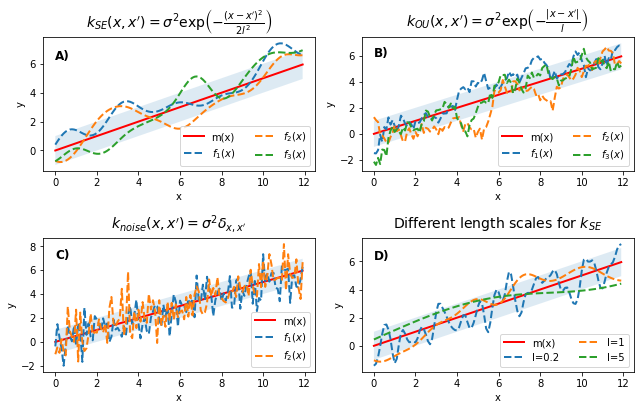

In [10]:
X = np.arange(0, 12, 0.1).reshape(-1, 1)

# Mean and covariance of the prior

cov1 = kernel1(X, X)
cov2 = kernel2(X, X)
cov3 = kernel3(X, X)
cov4 = kernel1(X, X, l=5)
cov5 = kernel1(X, X, l=1)
cov6 = kernel1(X, X, l=0.2)

# Draw samples from the prior
samples1 = np.random.multivariate_normal(0.5*X.ravel(), cov1, 3)
samples2 = np.random.multivariate_normal(0.5*X.ravel(), cov2, 3)
samples3 = np.random.multivariate_normal(0.5*X.ravel(), cov3, 2)
sample4 = np.random.multivariate_normal(0.5*X.ravel(), cov4, 1)
sample5 = np.random.multivariate_normal(0.5*X.ravel(), cov5, 1)
sample6 = np.random.multivariate_normal(0.5*X.ravel(), cov6, 1)

fig, axes = plt.subplots(2,2, figsize=(9,5.8))

plot_gp(axes[0][0], 0.5*X, cov1, X, samples=samples1)
plot_gp(axes[0][1], 0.5*X, cov2, X, samples=samples2)
plot_gp(axes[1][0], 0.5*X, cov3, X, samples=samples3)
plot_gp(axes[1][1], 0.5*X, cov4, X, samples=[])
axes[1][1].plot(X.ravel(), sample6.ravel(), lw=2, ls='--', label='l={l}'.format(l=0.2))
axes[1][1].plot(X.ravel(), sample5.ravel(), lw=2, ls='--', label='l={l}'.format(l=1))
axes[1][1].plot(X.ravel(), sample4.ravel(), lw=2, ls='--', label='l={l}'.format(l=5))
axes[0][0].legend(loc=4, ncol=2)
axes[0][1].legend(loc=4, ncol=2)
axes[1][0].legend(loc=4, ncol=1)
axes[1][1].legend(loc=4, ncol=2)
axis_label(axes[0][0], "A)", (0,0.8))
axis_label(axes[0][1], "B)", (0,0.8))
axis_label(axes[1][0], "C)", (0,0.8))
axis_label(axes[1][1], "D)", (0,0.8))
axes[0][0].set_title(r"$k_{SE}(x,x') = \sigma^2\exp\left(-\frac{(x-x')^2}{2l^2}\right)$", fontsize=14, pad=10)
axes[0][1].set_title(r"$k_{OU}(x,x') = \sigma^2\exp\left(-\frac{|x-x'|}{l}\right)$", fontsize=14, pad=10)
axes[1][0].set_title(r"$k_{noise}(x,x') = \sigma^2\delta_{x,x'}$", fontsize=14, pad=10)
axes[1][1].set_title(r"Different length scales for $k_{SE}$", fontsize=14, pad=10)
plt.tight_layout()
#plt.savefig("Kap2-GPintroduction/img/gp_diff_cov_func.png", bbox_inches='tight', dpi=300, transparent=True)

In [12]:
def l(x):
    return 2*np.exp(-0.3*(x-6)**2)+0.1

def kernel_nonstationary(X1, X2, sigma_f=1.0):
    cov = np.zeros((X1.size, X2.size))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            sqdist = (x1-x2)**2
            cov[i,j] = sigma_f**2 * np.exp(-0.5 / (l(x1)**2 + l(x2)**2) * sqdist)
    
    return cov

/home/korbi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


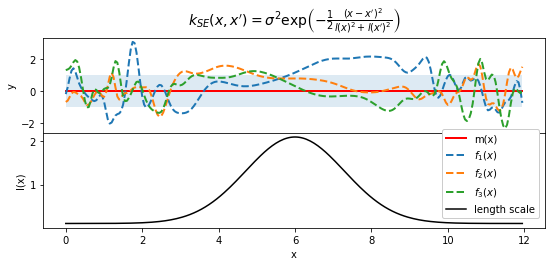

In [13]:
X = np.arange(0, 12, 0.05).reshape(-1, 1)
cov_nonstationary = kernel_nonstationary(X, X)
samples_non_stat = np.random.multivariate_normal(0.0*X.ravel(), cov_nonstationary, 3)

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(9,3.5), sharex="col", gridspec_kw={'hspace': 0})
plot_gp(ax1, 0*X, cov_nonstationary, X, samples=samples_non_stat)
ax2.plot(X, l(X), color="black", label="length scale")
ax1.set_title(r"$k_{SE}(x,x') = \sigma^2\exp\left(-\frac{1}{2}\frac{(x-x')^2}{l(x)^2+l(x')^2}\right)$", fontsize=14, pad=12)
ax2.set_xlabel("x")
ax2.set_ylabel("l(x)")
ax1.get_legend().remove()
fig.legend(loc=4, framealpha=1, bbox_to_anchor=(0.84,0.17))
#plt.savefig("Kap2-GPintroduction/img/gp_non_stationary.png", bbox_inches='tight', dpi=300, transparent=True)

In [15]:
def kernel(X,Y,sigma=1,l=1.5, squared=False):
    sqdist = np.zeros((X.size,Y.size))
    for i, x_i in enumerate(X):
        for j, x_j in enumerate(Y):
            sqdist[i][j] = abs(x_i-x_j)**2
    return sigma**2*np.exp(-0.5/l**2 * sqdist)

In [16]:
kap3_eq_squared_exponentialx = np.arange(0,12,2)
y = np.random.rand(6)
x_fit = np.arange(0, 12, 0.1)

K = kernel(x,x)
K_s = kernel(x_fit, x)
K_ss = kernel(x_fit, x_fit)
K_inv = np.linalg.inv(K)

mean = np.dot(np.dot(K_s,K_inv), y)
cov = K_ss - K_s.dot(K_inv).dot(K_s.T)

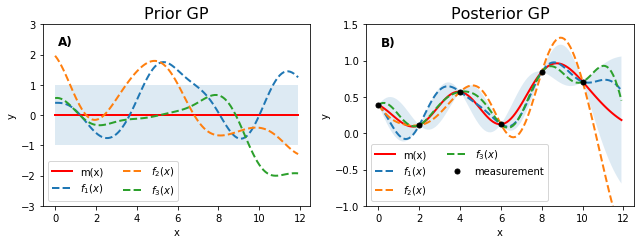

In [17]:
samples_prior = np.random.multivariate_normal(x_fit*0, K_ss, 3)
samples_post = np.random.multivariate_normal(mean, cov, 3)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,3.5))
plot_gp(ax1, x_fit*0, K_ss, x_fit, samples=samples_prior)
plot_gp(ax2, mean, cov, x_fit, samples=samples_post)
ax2.plot(x, y, ".", markersize=10, color="black", label="measurement")
ax1.legend(ncol=2, loc=3)
ax2.legend(ncol=2, loc=3)
ax1.set_ylim((-3,3))
ax2.set_ylim((-1,1.5))
axis_label(ax1, "A)", (0.01,0.77))
axis_label(ax2, "B)", (0.01,0.8))
ax1.set_title("Prior GP", fontsize=16)
ax2.set_title("Posterior GP", fontsize=16)
plt.tight_layout()
#plt.savefig("Kap2-GPintroduction/img/gp_fit_demo.png", bbox_inches='tight', dpi=300, transparent=True)

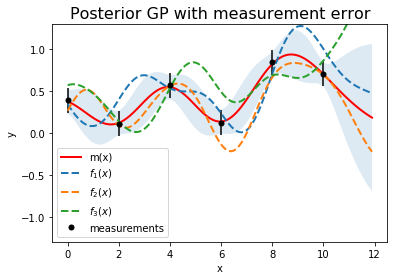

In [27]:
var = 0.15**2
K = kernel(x,x) + var*np.eye(x.size)
K_s = kernel(x_fit, x)
K_ss = kernel(x_fit, x_fit)
K_inv = np.linalg.inv(K)
mean_error = np.dot(np.dot(K_s,K_inv), y)
cov_error = K_ss - K_s.dot(K_inv).dot(K_s.T)
samples_error = np.random.multivariate_normal(mean_error, cov_error, 3)

fig = plt.figure(figsize=(6,4))
ax = plt.subplot()
ax.set_ylim([-1.3,1.3])
plot_gp(ax, mean_error, cov_error, x_fit, samples=samples_error)
ax.plot(x, y, ".", markersize=10, color="black", label="measurements")
ax.errorbar(x, y, np.sqrt(var), linestyle="", markersize=10, color="black")
ax.set_title("Posterior GP with measurement error", fontsize=16)
ax.legend(ncol=1, loc=3)
#plt.savefig("Kap2-GPintroduction/img/gp_fit_error.png", bbox_inches='tight', dpi=300, transparent=True)

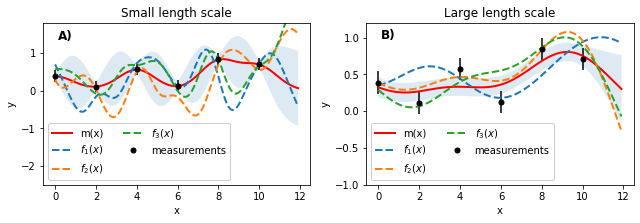

In [33]:
K = kernel(x,x, l=0.9) + var*np.eye(x.size)
K_s = kernel(x_fit, x, l=0.9)
K_ss = kernel(x_fit, x_fit, l=0.9)
K_inv = np.linalg.inv(K)
mean1 = np.dot(np.dot(K_s,K_inv), y)
cov1 = K_ss - K_s.dot(K_inv).dot(K_s.T)
samples_1 = np.random.multivariate_normal(mean1, cov1, 3)

K = kernel(x,x, l=3) + var*np.eye(x.size)
K_s = kernel(x_fit, x, l=3)
K_ss = kernel(x_fit, x_fit, l=3)
K_inv = np.linalg.inv(K)
mean2 = np.dot(np.dot(K_s,K_inv), y)
cov2 = K_ss - K_s.dot(K_inv).dot(K_s.T)
samples_2 = np.random.multivariate_normal(mean2, cov2, 3)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,3.2))
plot_gp(ax1, mean1, cov1, x_fit, samples=samples_1)
plot_gp(ax2, mean2, cov2, x_fit, samples=samples_2)
ax1.set_title("Small length scale")
ax2.set_title("Large length scale")
ax1.set_ylim([-2.5,1.8])
ax2.set_ylim([-1,1.2])
ax1.plot(x, y, ".", markersize=10, color="black", label="measurements")
ax1.errorbar(x, y, np.sqrt(var), linestyle="", markersize=10, color="black")
ax2.plot(x, y, ".", markersize=10, color="black", label="measurements")
ax2.errorbar(x, y, np.sqrt(var), linestyle="", markersize=10, color="black")
ax1.legend(loc=3, framealpha=1, ncol=2)
ax2.legend(loc=3, framealpha=1, ncol=2)
axis_label(ax1, "A)", (0.01,0.75))
axis_label(ax2, "B)", (0.01,0.82))
plt.tight_layout()
#plt.savefig("Kap2-GPintroduction/img/gp_fit_diff_l_scale.png", bbox_inches='tight', dpi=300, transparent=True)

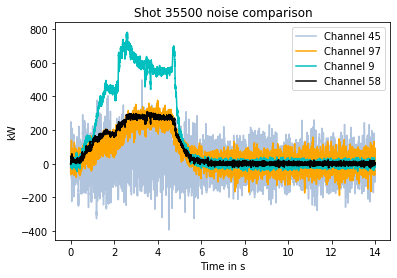

In [33]:
data = np.loadtxt("35500_channel_8_44_57_96.txt")/1000
time = np.arange(data[:,0].size)/2500
plt.plot(time, data[:,1], color="lightsteelblue", label="Channel 45")
plt.plot(time, data[:,3], color="orange", label="Channel 97")
plt.plot(time, data[:,0], color="c", label="Channel 9")
plt.plot(time, data[:,2], color="black", label="Channel 58")
plt.ylabel("kW")
plt.xlabel("Time in s")
plt.title("Shot 35500 noise comparison")
plt.legend()
plt.savefig("Kap4-ResultsASDEX/img/noise_compare.png", bbox_inches='tight', dpi=300, transparent=True)